In [142]:
import polars as pl
import pandas as pd
import time

def timeTaken(statTime):
    return round(time.time() - startTime,2)

In [143]:
statsDict = {}

statsList = ["readTime","writeTime","describeTime","groupbyTime","filterTime"]

for stats in statsList:
    statsDict[stats] = {"pd_"+stats:"","pl_"+stats:""}

In [144]:
startTime = time.time()
df_pd = pd.read_csv("./ml-25m/ml-25m/ratings.csv")
statsDict["readTime"]["pd_readTime"] = timeTaken(startTime)

In [145]:
startTime = time.time()
df_pl = pl.read_csv("./ml-25m/ml-25m/ratings.csv")
statsDict["readTime"]["pl_readTime"] = timeTaken(startTime)

In [146]:
startTime = time.time()
df_pd.to_csv("test_pd.csv",index=False)
statsDict["writeTime"]["pd_writeTime"] = timeTaken(startTime)

In [147]:
startTime = time.time()
df_pl.write_csv("test_pl.csv")
statsDict["writeTime"]["pl_writeTime"] = timeTaken(startTime)

In [148]:
startTime = time.time()
df_pd.describe()
statsDict["describeTime"]["pd_describeTime"] = timeTaken(startTime)

In [149]:
startTime = time.time()
df_pl.describe()
statsDict["describeTime"]["pl_describeTime"] = timeTaken(startTime)

In [150]:
print(df_pd.columns)
print(df_pl.columns)


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
['userId', 'movieId', 'rating', 'timestamp']


In [151]:
startTime = time.time()
tmp_df_pd = df_pd.groupby("userId")["rating"].agg({"count","min","max"})
statsDict["groupbyTime"]["pd_groupbyTime"] = timeTaken(startTime)

In [152]:
startTime = time.time()
tmp_df_pl = df_pl.groupby("userId").agg(
    pl.count("rating").alias("count"),
    pl.col("rating").min().alias("min"),
    pl.col("rating").max().alias("max")
).sort("userId", descending=False)
statsDict["groupbyTime"]["pl_groupbyTime"] = timeTaken(startTime)

In [153]:
tmp_df_pl.head()

userId,count,min,max
i64,u32,f64,f64
1,70,0.5,5.0
2,184,0.5,5.0
3,656,2.0,5.0
4,242,0.5,5.0
5,101,2.0,5.0


In [154]:
tmp_df_pd  =tmp_df_pd[["count","min","max"]]
tmp_df_pd.head()

,count,min,max
userId,,,
1,70,0.5,5.0
2,184,0.5,5.0
3,656,2.0,5.0
4,242,0.5,5.0
5,101,2.0,5.0


In [155]:
startTime = time.time()
tmp_df_pd = df_pd[df_pd["rating"] >= 4 ]
statsDict["filterTime"]["pd_filterTime"] = timeTaken(startTime)

In [156]:
startTime = time.time()
tmp_df_pl = df_pl.filter(pl.col("rating") >= 4 )
statsDict["filterTime"]["pl_filterTime"] = timeTaken(startTime)

In [157]:
tmp_df_pl

userId,movieId,rating,timestamp
i64,i64,f64,i64
1,296,5.0,1147880044
1,307,5.0,1147868828
1,665,5.0,1147878820
1,1088,4.0,1147868495
1,1237,5.0,1147868839
1,1250,4.0,1147868414
1,1653,4.0,1147868097
1,2351,4.5,1147877957
1,2573,4.0,1147878923


In [158]:
tmp_df_pd

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
5,1,1088,4.0,1147868495
8,1,1237,5.0,1147868839
...,...,...,...,...
25000088,162541,41566,4.0,1240952749
25000089,162541,45517,4.5,1240953353
25000090,162541,50872,4.5,1240953372
25000093,162541,58559,4.0,1240953434


In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [160]:
sns.set()

In [161]:
percent_changes(4,2)

100.0

In [183]:
def percent_changes(pd_time,pl_time):
    return round((pl_time-pd_time)/pl_time*100,2)


percent_changes(4,2)

-100.0

In [186]:
def compare_runtimes(statsDict):
    pandas_times = {}
    polars_times = {}
    for key in statsDict.keys():
        for module in statsDict[key].keys():
            tmp =  module.replace("Time","").split("_")
            if("pd" in module):pandas_times[tmp[1]] = statsDict[key][module]
            elif("pl" in module):polars_times[tmp[1]] = statsDict[key][module]

    fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(12, 10))

  # Setting the title and labels for the graph
    ax[0].set_title("Compare time taken for tasks using Pandas and Polars")
    ax[0].set_xlabel("Tasks")
    ax[0].set_ylabel("Time (Seconds)")

  # Creating a bar graph for Pandas and Polars runtimes
    operations = pandas_times.keys()
    num_operations = len(operations)
    bar_width = 0.35
    pandas_x = np.arange(num_operations)
    polars_x = pandas_x + bar_width

    pandas_y = list(pandas_times.values())
    polars_y = list(polars_times.values())

    pandas_bar = ax[0].bar(pandas_x, pandas_y, bar_width, color='tab:blue', label='Pandas')
    polars_bar = ax[0].bar(polars_x, polars_y, bar_width, color='tab:orange', label='Polars')

  # Setting the x-axis ticks and labels
    ax[0].set_xticks(pandas_x + bar_width / 2)
    ax[0].set_xticklabels(operations)

  # Setting the y-axis limit as the maximum of the two maximum values of runtimes
    ax[0].set_ylim(0, max(max(pandas_y), max(polars_y)) * 1.2)

  # Adding values on top of the bars
    for i, bars in enumerate(zip(pandas_bar, polars_bar)):
        for bar in bars:
            height = bar.get_height()
            ax[0].annotate(f"{height:.2f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

  # Adding a legend to the graph
    ax[0].legend()
    
    ax[1].set_title("Percentage Time Reduced with Polars compared to Pandas")
    ax[1].set_xlabel("Tasks")
    ax[1].set_ylabel("Percentage Time Reduced")
    
    percents = []
    for pd_operationTime, pl_operationTime in zip(pandas_y,polars_y):
        percents.append(percent_changes(pd_operationTime,pl_operationTime))

    bars = ax[1].bar(pandas_x, percents, bar_width, color='tab:blue')
    ax[1].set_xticks(pandas_x + bar_width / 2)
    ax[1].set_xticklabels(operations)
    ax[1].set_ylim(0, min(min(percents), min(percents)) * 1.2)
    for bar in bars:
        height = bar.get_height()
        ax[1].annotate(f"{height:.2f}%", xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    
  # Displaying the graph
#     fig.tight_layout()
    fig.tight_layout(pad=5.0)
    plt.show()

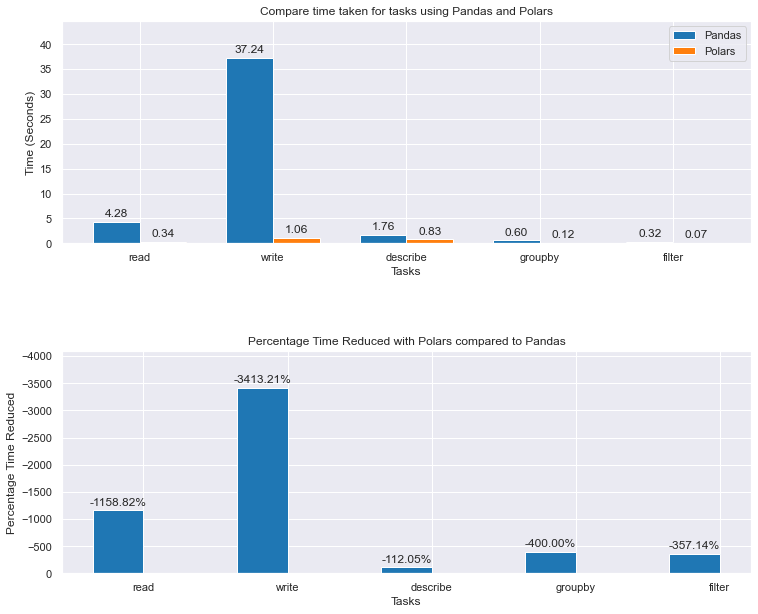

In [187]:
compare_runtimes(statsDict)

In [180]:
pd.show_versions


INSTALLED VERSIONS
------------------
commit           : db08276bc116c438d3fdee492026f8223584c477
python           : 3.8.5.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 165 Stepping 5, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : English_United States.1252

pandas           : 1.1.3
numpy            : 1.23.1
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.2.4
setuptools       : 50.3.1.post20201107
Cython           : 0.29.21
pytest           : 6.1.1
hypothesis       : None
sphinx           : 3.2.1
blosc            : None
feather          : None
xlsxwriter       : 1.3.7
lxml.etree       : 4.6.1
html5lib         : 1.1
pymysql          : None
psycopg2         : 2.9.6 (dt dec pq3 ext lo64)
jinja2           : 3.1.2
IPython          : 7.19.0
pandas_datareader: 0.10.0
bs4          